# Интерполяция и апроксимация эксперементальных данных

## 1. Загрузка данных из csv файла


In [1]:
#1
#пользуемся библиотекой pandas и считываем в датасет все наши данные
#далее создаем массив из наших данных в датасете ,преобразуя данные в тип float
import pandas as pd
import numpy as np
from matplotlib import pyplot
text = pd.read_csv('moscow.csv', sep='\t')
tables_numbers = text.values
tables_numbers
for i in range(len(tables_numbers)):
    for j in range(len(tables_numbers[i])):
        if(type(tables_numbers[i][j]) == str):
            tables_numbers[i][j] = tables_numbers[i][j].replace(',' ,'.')
        tables_numbers[i][j] = float(tables_numbers[i][j])
print(tables_numbers)

[[1779.0 999.9 999.9 ... -2.1 -5.2 999.9]
 [1780.0 -16.7 -12.0 ... -1.9 -10.8 3.1]
 [1781.0 -12.5 -14.9 ... 2.6 -11.2 3.1]
 ...
 [2017.0 -7.8 -4.6 ... 0.0 0.0 6.3]
 [2018.0 -4.3 -9.1 ... -0.6 -5.6 6.6]
 [2019.0 -6.6 -1.4 ... 999.9 999.9 999.9]]


## 2. Интерполюционный полином Лагранжа

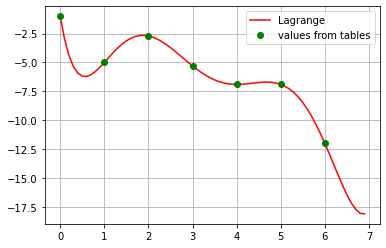

In [2]:
#2
#создаем функцию lagrange() для вычисления полинома лагранжа, для нее нужны функции li() для вычисления подфункций
# далее создаем в основной прорамме массив значений и массив х-ов ,для подстановки в наш полином
# Далее создаем массив с шагом по сетке 0.1 и массив значений нашего полинома в этих точках
# И отстраиваем график с узлами в точках нашей таблицы
#для примера взяты значения из 3 столбца и первых 12 строк
def lagrange(x,mas_x,mas_y):
    L = 0
    for i in range(len(mas_y)):
        L+=mas_y[i]*li(x,mas_x,i)
    return L
def li(x,mas_x, i):
    li = 1
    for j in range(len(mas_x)):
        if(j!=i):
            li*= (x-mas_x[j])/(mas_x[i] - mas_x[j])
    return li
mas_y = []
mas_x = []
j = 0
for i in range(12):
    if tables_numbers[i][3]!=999.9:
        mas_y.append(tables_numbers[i][3])
        mas_x.append(j)
        j+=1
h = 0.1
x = np.arange(0, (len(mas_x)) , h)
y = [lagrange(elem ,mas_x,mas_y) for elem in x]
pyplot.plot(x,y,'r', label = 'Lagrange')
pyplot.plot(mas_x,mas_y,'go' , label ='values from tables' )
pyplot.grid()
pyplot.legend()
pyplot.show()

## Интерполяционный полином Нютона(1-я формула) 

[0, 1, 2, 3]
[-1.0, -5.0, -2.7, -5.3]


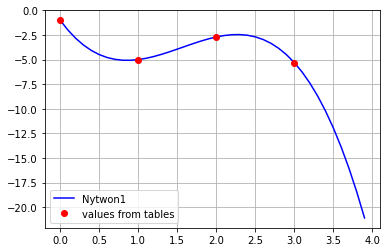

In [3]:
#3
#Создаем массивы значений,затем создаем необходимые функции для вычислений - факториал(fact),
#конечных разностей(finite_difference) и функцию вычисления полинома Ньютона(nytwon)
#и затем строим график на сетке с шагом 0.1 нашей интерполяции полиномом Ньютона
mas_y = []
mas_x = []
j = 0
for i in range(6):
    if tables_numbers[i][3]!=999.9:
        mas_y.append(tables_numbers[i][3])
        mas_x.append(j)
        j+=1
h = 1
def fact(n):
    if n == 1:
        return 1
    else:
        return n*fact(n-1)
def finite_difference(yn,k,index=0):
    diff = 0
    if k == 1:
        diff = yn[index+1]-yn[index]
    else:
        index+=1
        return finite_difference(yn , k-1 , index) - finite_difference(yn , k-1 ,index-1)
    return diff
def nytwon(x ,xn , yn):
    pn = yn[0]
    for i in range(1,len(xn)):
        x_res = 1
        for j in range(i):
            x_res*=(x - xn[j])
        pn+= x_res*finite_difference(yn , i)/(h**i*fact(i))
    return pn
print(mas_x)
print(mas_y)
x = np.arange(0, (len(mas_x)) , 0.1)
y = [nytwon(elem ,mas_x,mas_y) for elem in x]
pyplot.plot(x,y,'b', label = 'Nytwon1')
pyplot.plot(mas_x,mas_y,'ro' , label ='values from tables' )
pyplot.grid()
pyplot.legend()
pyplot.show()
    

    





## Интерполяционный полином Нютона(2-я формула) 

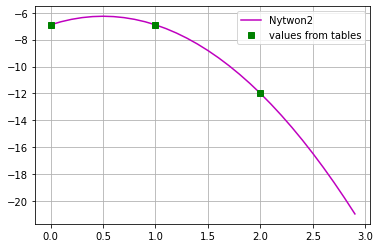

In [4]:
#4
#Создаем массивы значений,затем создаем необходимые функции для вычислений - факториал(fact),
#конечных разностей(finite_difference_reverse) и функцию вычисления полинома Ньютона(nytwon2)
#и затем строим график на сетке с шагом 0.1 нашей интерполяции полиномом Ньютона 
mas_x = []
mas_y = []
j = 0
for i in range(6,12):
    if tables_numbers[i][3]!=999.9:
        mas_y.append(tables_numbers[i][3])
        mas_x.append(j)
        j+=1
h = 1
def finite_difference_reverse(yn,k,index):
    diff = 0
    if k == 1:
        diff = yn[index+1]-yn[index]
    else:
        index-=1
        return finite_difference(yn , k-1 , index) - finite_difference(yn , k-1 ,index-1)
    return diff
def nytwon2(x ,xn , yn):
    pn = yn[len(yn) -1]
    for i in range(len(xn)-1 , 0 , -1):
        x_res = 1
        for j in range(i):
            x_res*=(x - xn[j])
        pn+= x_res*finite_difference(yn , i)/(h**i*fact(i))
    return pn
x = np.arange(0, (len(mas_x)) , 0.1)
y = [nytwon(elem ,mas_x,mas_y) for elem in x]
pyplot.plot(x,y,'m', label = 'Nytwon2')
pyplot.plot(mas_x,mas_y,'gs' , label ='values from tables' )
pyplot.grid()
pyplot.legend()
pyplot.show()
    


## Апроксимация степенным полиномом

input a power of polynom = 5


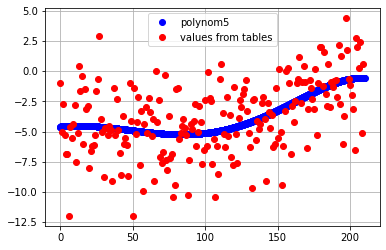

In [8]:
#5 method polinominal aproksimation 
#Создаем массивы значений,затем создаем необходимые функции для вычислений - 
# создание матрицы значений - create_matrix() , создание вектора значение - create_vector() 
# и функцию вычисления полинома - polynom()
mas_x = []
mas_y = []
j = 0
for i in range(len(tables_numbers)):
    if tables_numbers[i][3]!=999.9:
        mas_y.append(tables_numbers[i][3])
        mas_x.append(j)
        j+=1
mas_x = np.array(mas_x,dtype='float')
mas_y = np.array(mas_y,dtype = 'float')
def create_matrix(m, m_x):
    matrix = [[0 for i in range(m+1)] for i in range(m+1)]
    for i in range(m+1):
        for j in range(m+1):
            res_x = 0 
            for x in m_x:
                res_x+=pow(x,j+i)
            matrix[i][j] = res_x
    return matrix
def create_vector(m , m_y,m_x):
    vector = [0 for i in range(m+1)]
    for i in range(m+1):
        res_y = 0
        for j in range(len(m_y)):
            res_y +=m_y[j]*pow(m_x[j] , i)
        vector[i] = res_y
    return vector
m = int(input('input a power of polynom = '))
solutions =np.linalg.solve(np.matrix(create_matrix(m , mas_x),dtype='float') ,np.array(create_vector(m, mas_y,mas_x),dtype='float'))
def polynom(m , x,matrix_a):
    y = 0 
    for i in range(m+1):
        y+=matrix_a[i]*pow(x,i)
    return y
x = np.arange(0, (len(mas_x)) , 0.1)
y = [polynom(m,elem ,solutions) for elem in x]
pyplot.plot(x,y,'bo', label = 'polynom{n}'.format(n = str(m)))
pyplot.plot(mas_x,mas_y,'ro' , label ='values from tables' )
pyplot.grid()
pyplot.legend()
pyplot.show()